In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
track = pd.read_csv('CA1_6_1D_NB_track.csv')
track.columns = ['time', 'x', 'y']
track = track.set_index('time')
track.index = (track.index * 20).astype(np.int32)

In [3]:
neuropil = pd.read_csv('CA1_6_1day_conc_recording_20161116_121433_corrected_neuropil_30.csv')
neuropil.columns = list(range(len(neuropil.columns)))
neuropil = neuropil.set_index(0)
neuropil.index = (neuropil.index * 20).astype(np.int32)

In [4]:
full_data = neuropil.iloc[645:].reset_index().drop([0], axis=1).join(track, how='inner').loc[10:]

In [5]:
fine_cells = pd.read_csv('CA1_6_1D_NB_fine_cells.csv')
fine_cells['time'] = fine_cells['time,s\cell#']
fine_cells.drop(['time,s\cell#'], axis=1, inplace=True)
fine_cells.set_index('time', inplace=True)
fine_cells.index = (fine_cells.index * 20).astype(np.int32)

In [6]:
best_columns = fine_cells.columns.astype(int)
best_columns

Int64Index([  4,  69,  92, 116, 123, 128, 136, 143, 147, 153, 161, 165, 170,
            176, 188, 192, 208, 231, 273, 354, 408, 543, 570, 577],
           dtype='int64')

In [7]:
best_columns = best_columns + 1

Пересечения: 93 129 154 274

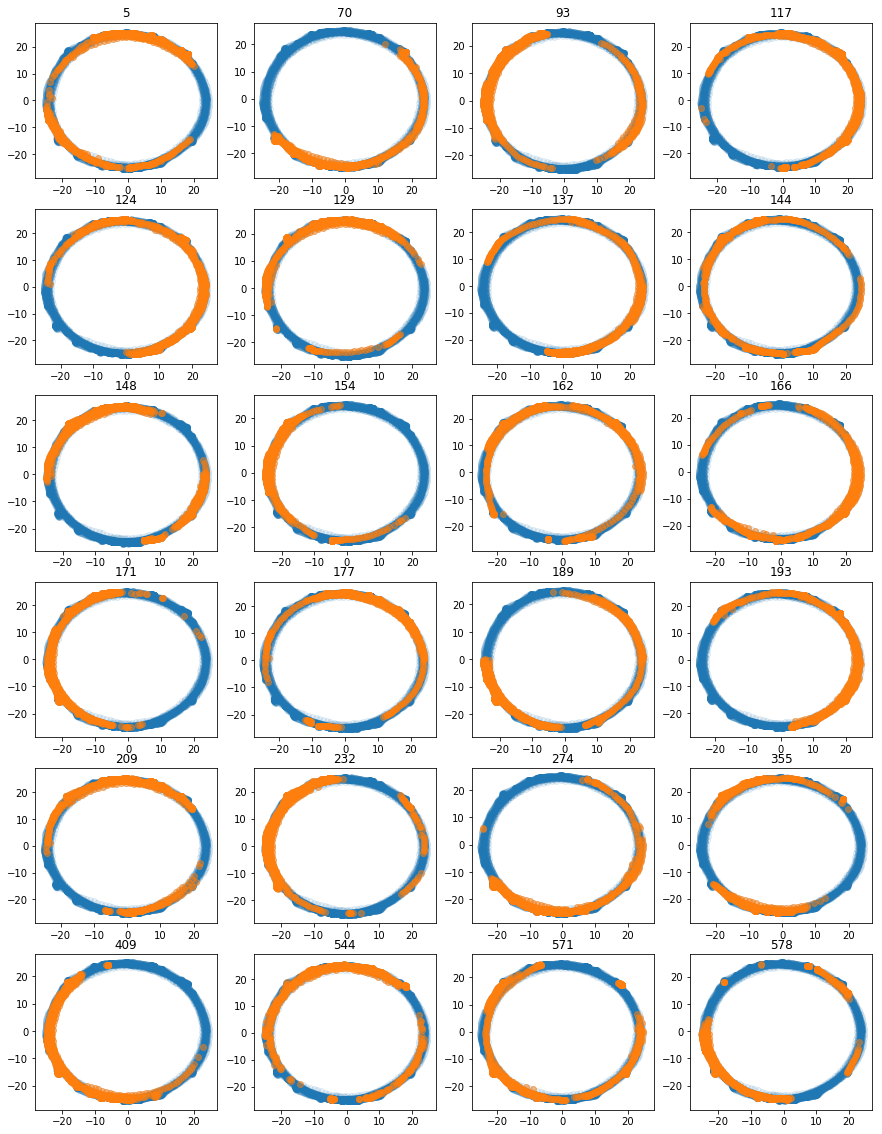

In [8]:
new_data = full_data
new_data['x'] = new_data['x'] - 4
new_data['y'] = new_data['y'] - 4
quantiles = new_data[best_columns].quantile(0.85)
plt.figure(figsize=(15, 20))
for i, col in enumerate(best_columns):
    plt.subplot(6, 4, i + 1)
    plt.title(col)
    quantile = quantiles[col]
    active_state = (new_data[col] > quantile).values
    plt.scatter(new_data['x'], new_data['y'], alpha=0.1)
    plt.scatter(new_data[active_state].x, new_data[active_state].y, alpha=.5)

In [9]:
cols = [120, 147, 382, 106, 77, 397, 31, 383, 274, 158, 231, 129, 462, 154, 119, 71, 133, 344, 251, 93]
cols.sort()

In [10]:
def active_robert(x: float, y: float, col: int) -> bool:
    if col == 31:
        return (x < 8 and y > 0) or (x < -2 and y < 0)
    elif col == 71:
        return x < 1 and y < 5
    elif col == 77:
        return y < -1
    elif col == 93:
        return x < -6 or x > 12
    elif col == 106:
        return (x > -20 and y > 0) or (x > 13 and y < 0)
    elif col == 119:
        return (x > -7 and y < 0) or (x < 0 and y > 13)
    elif col == 120:
        return x > -7 and y < 7
    elif col == 129:
        return (x > -12 and y < -18) or (y > 12) or (y < 12 and x < -20 and y > -7)
    elif col == 133:
        return x > -13 and y < -13
    elif col == 147:
        return x > -6 and y < 10
    elif col == 154:
        return x < -10 or (x > -5 and y < -17)
    elif col == 158:
        return (x > -8 and y < 12) or (x < 0 and y > 12)
    elif col == 231:
        return x > -10 and y < 9
    elif col == 251:
        return (x < 0 and y > 0) or (x > 11 and y < 18)
    elif col == 274:
        return x > 7 or y < - 12
    elif col == 344:
        return (y < 6 and x < 0) or (x > 0 and y < 0)
    elif col == 382:
        return x < -10
    elif col == 383:
        return x > -10 and y < 10
    elif col == 397:
        return y < -14
    elif col == 462:
        return x < 10 and y > -18
    return False

In [11]:
def active_bio(x: float, y: float, col: int) -> bool:
    if col == 5:
        return (x < 19 and y > 10) or (x < 18 and y < -2)
    elif col == 70:
        return x > 17 or y < -14
    elif col == 93:
        return x < -6 or x > 12
    elif col == 117:
        return x > 5 or y > 10
    elif col == 124:
        return x > 0 or y > 1
    elif col == 129:
        return (x > -12 and y < -18) or (y > 12) or (y < 12 and x < -20 and y > -7)
    elif col == 137:
        return x > -5 or y > 9
    elif col == 144:
        return x < 21 or (x > 21 and y < 3)
    elif col == 148:
        return (x < 8 and y > -2) or (x > 5 and y < 5)
    elif col == 154:
        return x < -10 or (x > -5 and y < -17)
    elif col == 162:
        return y > -15 or (y < -15 and x > 1)
    elif col == 166:
        return y < -13 or x > 8 or (x < -4 and y > 6)
    elif col == 171:
        return x < 4
    elif col == 177:
        return y > -8 or (y < -8 and x > 11) or (y < -22 and x > -12 and x < -1)
    elif col == 189:
        return (x < -1 and y < 0) or (x > -1 and y > -24)
    elif col == 193:
        return x > 2 or y > 14
    elif col == 209:
        return y > 14 or (y < 14 and y > 0 and x < -20) or (x > -2 and y < -12)
    elif col == 232:
        return x < -4 or (x > 17 and y < -11) or (x > 17 and y > -3)
    elif col == 274:
        return x > 7 or y < - 12
    elif col == 355:
        return (x < 7 and y < -14) or (x < 12 and y > 10)
    elif col == 409:
        return x < -15 or y < -12
    elif col == 544:
        return (x < 16 and y > -12) or (x > 5 and y < 5)
    elif col == 571:
        return x < -7 or y < 5
    elif col == 578:
        return (x < 2 and y < 4) or (x > 10 and y > 12) or (y < -6 and x > 20)
    return False

In [12]:
r = np.sqrt((new_data.x - 4)**2 + (new_data.y - 4)**2)
r = r.median()
angles = np.linspace(-np.pi, np.pi, 720)

xs = []
ys = []

for angle in angles:
    xs.append(r * np.cos(angle))
    ys.append(r * np.sin(angle))

dots_robert = np.array([[False for _ in range(len(xs))] for _ in range(20)], np.bool)
inds_robert = []

for i, col in enumerate(cols):
    dots_robert[i] = [active_robert(xs[i], ys[i], col) for i in range(len(xs))]
    inds = [j for j in range(len(xs)) if dots_robert[i][j] == True]
    inds_robert.append(inds)

dots_bio = np.array([[False for _ in range(len(xs))] for _ in range(24)], np.bool)
inds_bio = []

for i, col in enumerate(best_columns):
    dots_bio[i] = [active_bio(xs[i], ys[i], col) for i in range(len(xs))]
    inds = [j for j in range(len(xs)) if dots_bio[i][j] == True]
    inds_bio.append(inds)

In [73]:
graph_bio_robert = [] # граф, где активность нейронов Роберта входит в активность нейронов биологов
graph_robert_bio = [] # соответственно, наоборот
for i in range(20):
    for j in range(24):
        robert = set(inds_robert[i])
        bio = set(inds_bio[j])
        diff = robert.intersection(bio)
        if len(robert) - 6 <= len(diff) and cols[i] != best_columns[j] and best_columns[j] != 154:
            graph_bio_robert.append([cols[i], best_columns[j]])
        if len(bio) - 6 <= len(diff) and cols[i] != best_columns[j]:
            graph_robert_bio.append([best_columns[j], cols[i]])

In [74]:
robs_in_graph = set()
bios_in_graph = set()
for (rob, bio) in graph_bio_robert:
    robs_in_graph.add(rob)
    bios_in_graph.add(bio)

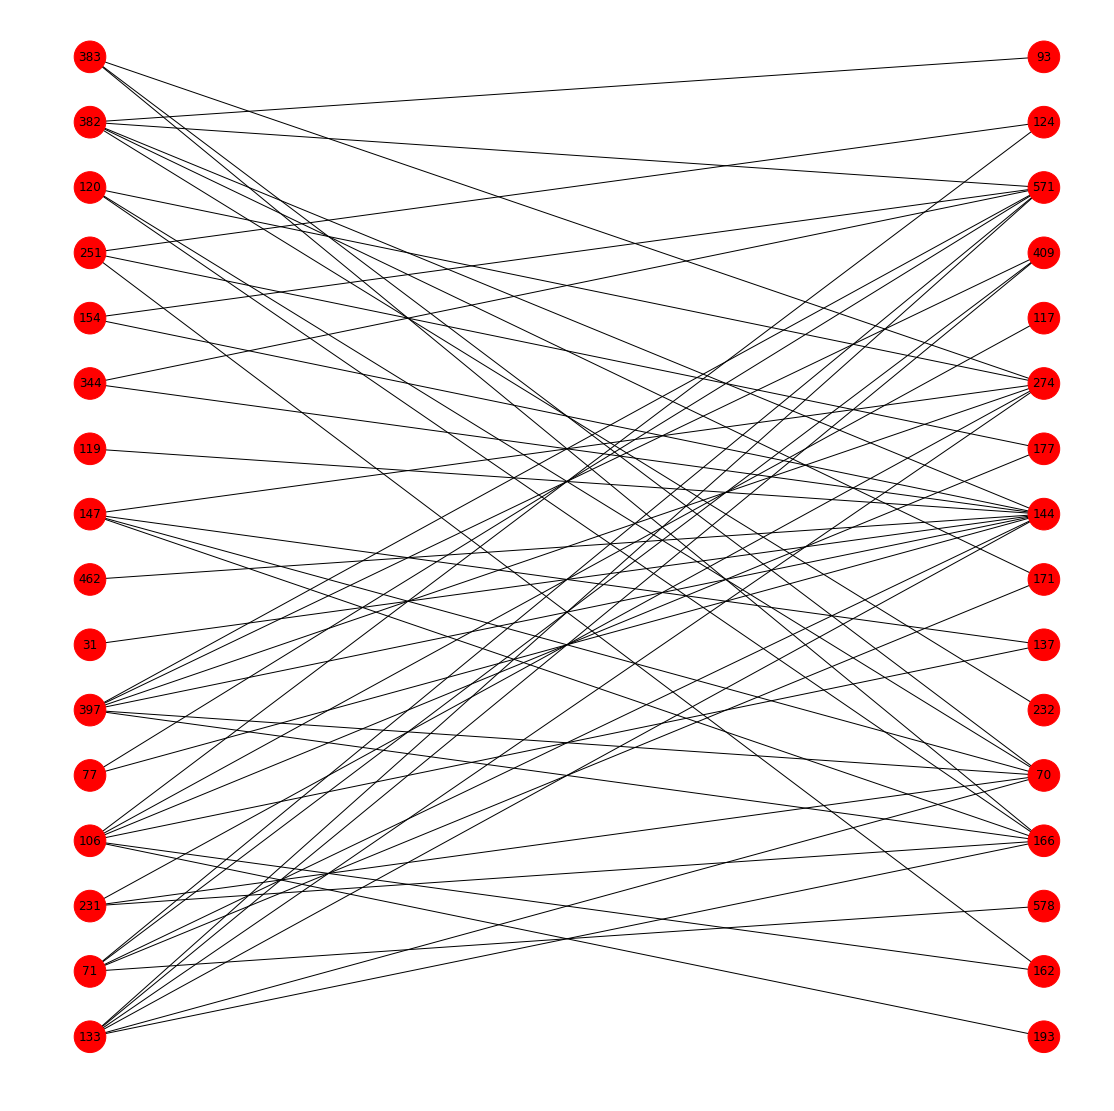

In [87]:
plt.figure(figsize=(15, 15))
graph = nx.Graph()
graph.add_nodes_from(robs_in_graph, bipartite=0)
graph.add_nodes_from(bios_in_graph, bipartite=1)
graph.add_edges_from(graph_bio_robert)
l, r = nx.bipartite.sets(graph)
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw(graph, with_labels=True, pos=pos, node_size=[1000 for i in range(len(l) + len(r))])
plt.show()

Ребро обозначает, что активность нейрона из левой доли входит в активность нейрона из правой доли.

Граф получился не очень удобным для рассмотрения, поэтому ниже будет список всех ребер.

Также еще существует две пары нейронов, активность которых входят друг в друга. Их на графе нет, из-за того, что тогда граф не будет двудольным. Активность нейрона 70 входит в активность нейрона 274, активность нейрона 382 - в активность нейрона 154.

In [86]:
for (rob, bio) in graph_bio_robert:
    print('Активность нейрона', rob, 'входит в активность нейрона', bio)
for (bio, rob) in graph_robert_bio:
    print('Активность нейрона', bio, 'входит в активность нейрона', rob)
print('Активность нейрона 382 входит в активность нейрона 154')

Активность нейрона 31 входит в активность нейрона 144
Активность нейрона 71 входит в активность нейрона 144
Активность нейрона 71 входит в активность нейрона 171
Активность нейрона 71 входит в активность нейрона 409
Активность нейрона 71 входит в активность нейрона 571
Активность нейрона 71 входит в активность нейрона 578
Активность нейрона 77 входит в активность нейрона 144
Активность нейрона 77 входит в активность нейрона 571
Активность нейрона 106 входит в активность нейрона 117
Активность нейрона 106 входит в активность нейрона 124
Активность нейрона 106 входит в активность нейрона 137
Активность нейрона 106 входит в активность нейрона 162
Активность нейрона 106 входит в активность нейрона 177
Активность нейрона 106 входит в активность нейрона 193
Активность нейрона 119 входит в активность нейрона 144
Активность нейрона 120 входит в активность нейрона 70
Активность нейрона 120 входит в активность нейрона 166
Активность нейрона 120 входит в активность нейрона 274
Активность нейрона 

In [78]:
together = []
quant_bio = new_data[best_columns].quantile(0.85)
quant_robert = new_data[cols].quantile(0.85)
for i, (robert, bio) in enumerate(graph_bio_robert):
    value_robert = quant_robert[robert]
    value_bio = quant_bio[bio]
    activity_robert = new_data[new_data[robert] >= value_robert][robert]
    activity_bio = new_data[new_data[bio] >= value_bio][bio]
    time_bio = set(activity_bio.index.values)
    time_bio.update(activity_bio.index.values - 6)
    time_robert = set(activity_robert.index.values)
    diff = time_robert.difference(time_bio)
    if len(diff) == 0:
        together.append([robert, bio])
for i, (bio, robert) in enumerate(graph_robert_bio):
    value_robert = quant_robert[robert]
    value_bio = quant_bio[bio]
    activity_robert = new_data[new_data[robert] >= value_robert][robert]
    activity_bio = new_data[new_data[bio] >= value_bio][bio]
    time_robert = set(activity_robert.index.values)
    time_robert.update(activity_robert.index.values - 6)
    time_bio = set(activity_bio.index.values)
    diff = time_bio.difference(time_robert)
    if len(diff) == 0:
        together.append([bio, robert])

In [79]:
together

[]

После циклов для двух массивов видим, что ни один нейрон не зажигает другой.